<a href="https://colab.research.google.com/github/JraHike76/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Jay_Adamo_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy








  


Confidence Intervals:

1. Generate and numerically represent a confidence interval

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-13 20:27:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-05-13 20:27:19 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#using yeaterday's assignment dataframe, needs column headers

column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
#Needs to be cleaned
df = df.replace({'y':1, 'n':0, '?': np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# I want to use data from the democrat party

dem = df[df['party']=='democrat']
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
# I am going to choose Immigration, first I will remove the NaNs

dem_imm = dem['immigration'].dropna()

In [0]:
# Now I can get the sample mean

dem_imm.mean()

0.4714828897338403

In [0]:
# calculate a confidence interval with a confidence level of 95%

from scipy import stats

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [0]:
# check number of values

print(len(dem_imm))

263


In [0]:
# Calculating the confidence interval
lower, mean, upper = confidence_interval(dem_imm)
print(lower)
print(mean)
print(upper)

0.41075744059137587
0.4714828897338403
0.5322083388763047


2. Graphically (with a plot) represent the confidence interval

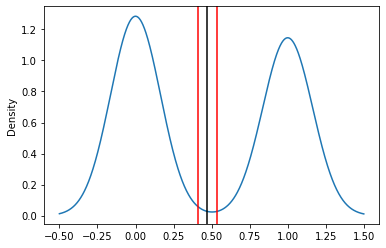

In [0]:
lower, mean, upper = confidence_interval(dem_imm)

dem_imm.plot.density()
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()

3. Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
# The black lines represents the mean of democrats who voted for the Immigration bill
# The red lines represent the range of values where the true value is represented with a confidence level of 95%
# The distribution of democrats who voted for the Immigration bill is binomial

Chi-squared tests:

4. Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
*   By hand using Numpy
*   In a single line using Scipy



In [0]:
# After loading in 4 different data sets and cleaning a few of them I could not find a quality set of data to work with 
# I am going to use the df from lecture but test different categories
# after failing to use race and years of education I used males and years of ed

In [20]:
#read in adult data 
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.describe(exclude = 'number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [6]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [7]:
#I want to look at Males and years of education 
observed = pd.crosstab(df['sex'], df['education-num'])

observed

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
sex,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3736,1187,484,327


In [8]:
#I am going to need the row totals
observed_margins = pd.crosstab(df['sex'], df['education-num'], margins=True)

observed_margins

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
sex,,,,,,,,,,,,,,,,,
Female,16,46,84,160,144,295,432,144,3390,2806,500,421,1619,536,92,86,10771
Male,35,122,249,486,370,638,743,289,7111,4485,882,646,3736,1187,484,327,21790
All,51,168,333,646,514,933,1175,433,10501,7291,1382,1067,5355,1723,576,413,32561


In [10]:
# expected value for a male with 1 year of education

21790*51 / 32561

34.12948005282393

In [15]:
#row sums from the crosstab
row_sums = observed_margins.iloc[0:2, 16:].values
row_sums = row_sums.T[0]

row_sums

array([10771, 21790])

In [16]:
# column sums from the crosstab
col_sums = observed_margins.iloc[2:, 0:16].values
col_sums = col_sums[0]

col_sums

array([   51,   168,   333,   646,   514,   933,  1175,   433, 10501,
        7291,  1382,  1067,  5355,  1723,   576,   413])

In [18]:
total_total = df.shape[0]

total_total

32561

In [21]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 16)
[[  16.87051995   55.57347747  110.15457142  213.69325266  170.02837751
   308.63127668  388.6835478   143.2340223  3473.67313657 2411.82276343
   457.15801112  352.95774086 1771.40459445  569.95893861  190.53763705
   136.61813212]
 [  34.12948005  112.42652253  222.84542858  432.30674734  343.97162249
   624.36872332  786.3164522   289.7659777  7027.32686343 4879.17723657
   924.84198888  714.04225914 3583.59540555 1153.04106139  385.46236295
   276.38186788]]


In [22]:
chi2 = ((observed - expected)**2 / expected).sum().sum()

chi2

297.7150037250369

In [23]:
from scipy import stats

# pass in our observed value table (contingency table)
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)

 chi2 statistic 297.7150037250368

 p-value 1.6677784409205546e-54

 degrees of freedom 15

 expected frequencies table: 
 [[  16.87051995   55.57347747  110.15457142  213.69325266  170.02837751
   308.63127668  388.6835478   143.2340223  3473.67313657 2411.82276343
   457.15801112  352.95774086 1771.40459445  569.95893861  190.53763705
   136.61813212]
 [  34.12948005  112.42652253  222.84542858  432.30674734  343.97162249
   624.36872332  786.3164522   289.7659777  7027.32686343 4879.17723657
   924.84198888  714.04225914 3583.59540555 1153.04106139  385.46236295
   276.38186788]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)